<h1><center> Predicting $CO_2$ Emission Of Cars Using Univariate Linear Regression</center></h1>

<h3> Load the Data and Libraries </h3>

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize']=(12,8)

In [3]:
data=pd.read_csv('DATA.csv')
data.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


<h3> Visualize the Data </h3>

In [5]:
#Normalize Values in Volume, Weight, and CO2 columns

df_max_scaled = data.copy()

for column in data.columns[2:5]:
    df_max_scaled[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
    
display(df_max_scaled.head())

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,0.40,0.452463,0.825000,NaN
1,Mitsubishi,Space Star,0.48,0.664376,0.791667,NaN
2,Skoda,Citigo,0.40,0.532073,0.791667,NaN
3,Fiat,500,0.36,0.495418,0.750000,NaN
4,Mini,Cooper,0.60,0.652921,0.875000,NaN


Text(0.5, 1.0, 'Weight of gas vs CO2')

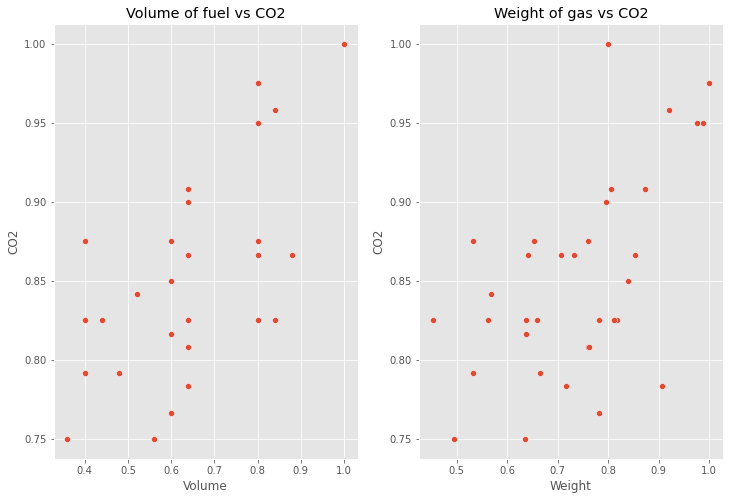

In [6]:
f, axes = plt.subplots(1, 2)

sns.scatterplot(x="Volume", y="CO2", data=df_max_scaled, ax=axes[0])
axes[0].set_title("Volume of fuel vs CO2")
sns.scatterplot(x="Weight", y="CO2", data=df_max_scaled, ax=axes[1])
axes[1].set_title("Weight of gas vs CO2")

I decided to compute the cost function for both of the Volume and Weight variables.

<h3> Compute the Cost $J(\theta)$ </h3>

The objective of linear regression is to minimize the cost function
<br>
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$
<br>
where $h_{\theta}(x)$ is the hypothesis and given by the linear model
<br>
$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(x, y, theta):
    m=len(y)
    y_pred = x.dot(theta)
    error=(y_pred - y)**2
    return 1 / (2*m) * np.sum(error)

In [8]:
m = df_max_scaled.Volume.values.size
x = np.append(np.ones((m, 1)), df_max_scaled.Volume.values.reshape(m, 1), axis=1)
y = df_max_scaled.CO2.values.reshape(m, 1)
theta = np.zeros((2, 1))

volume_CO2_cost_funct = cost_function(x, y, theta)
print(volume_CO2_cost_funct)

m = df_max_scaled.Weight.values.size
x = np.append(np.ones((m, 1)), df_max_scaled.Volume.values.reshape(m, 1), axis=1)
y = df_max_scaled.CO2.values.reshape(m, 1)
theta = np.zeros((2, 1))

weight_CO2_cost_funct = cost_function(x, y, theta)
print(weight_CO2_cost_funct)

0.3633227237654321
0.3633227237654321


Since the cost function of both of the Volume and Weight variables are the same, I realized that the Weight of Gas is converted from the Volume of Fuel and vice versa. Therefore, I decided to build model with the Weight of Gas variable only.

<h3> Gradient Descent </h3>

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
<br>
$\theta_j := \theta_j - \alpha \frac{i}{m} \sum_{1=1}^m (h{\theta}(x^{(i)}) - y{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [9]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha * (1/m) * error
        costs.append(cost_function(x, y, theta))
    return theta, costs

In [10]:
theta, costs = gradient_descent(x, y, theta, alpha=0.01, iterations = 2000)
print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)), str(round(theta[1,0],2))))

h(x) = 0.63 + 0.35x1


<h3> Visualizing the Cost Function $J(\theta)$ </h3>

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
theta_0 = np.linspace(0, 1, 100)
theta_1 = np.linspace(0, 1, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array((theta_0[i], theta_1[j]))
        cost_values[i, j] = cost_function(x, y, t)

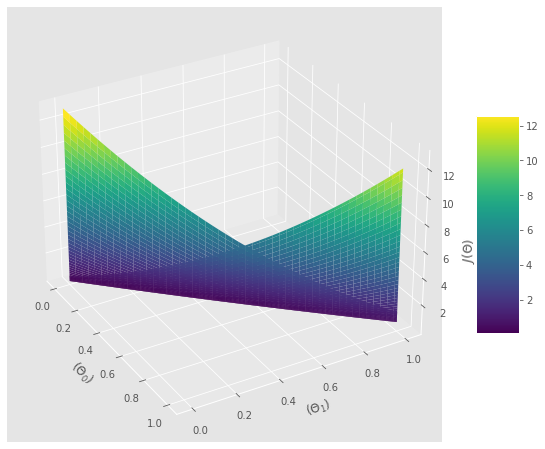

In [13]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(projection='3d')
plt.rcParams['axes.grid'] = False

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis")
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$(\Theta_0)$")
plt.ylabel("$(\Theta_1)$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

<h3> Plotting the Convergence </h3>

Plot $J(\theta)$ against the number of iterations of gradient descent.

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

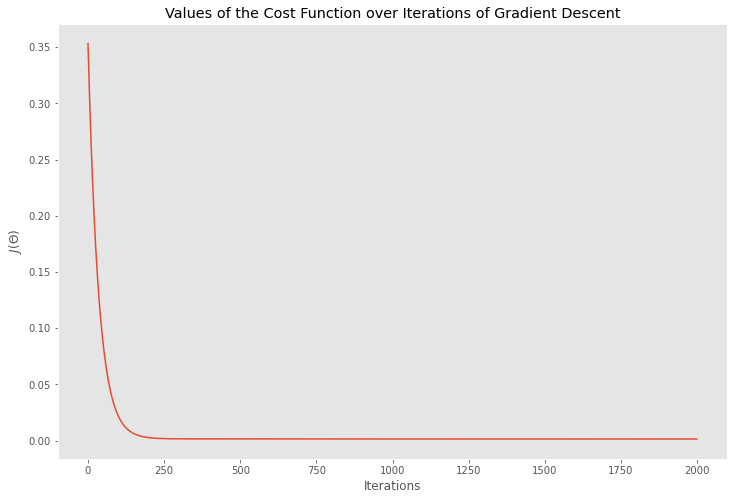

In [14]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

<h3> Training Data with Linear Regression Fit </h3>

In [15]:
theta.shape

(2, 1)

In [16]:
theta

array([[0.62514759],
       [0.34740034]])

Text(0.5, 1.0, 'Linear Regression Fit')

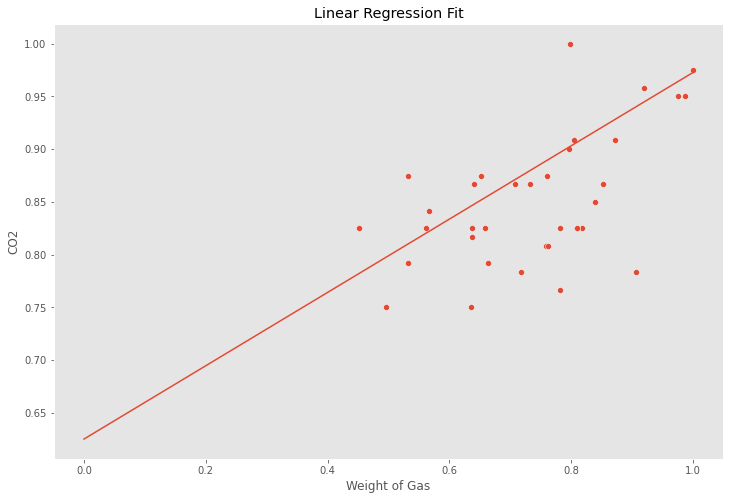

In [17]:
theta = np.squeeze(theta)
sns.scatterplot(x="Weight", y="CO2", data=df_max_scaled)

x_value = [x for x in range(0,2)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x=x_value, y=y_value)

plt.xlabel("Weight of Gas")
plt.ylabel("CO2")
plt.title("Linear Regression Fit")

<h3> Inference using the optimized $\theta$ values </h3>

$h_\theta(x) = \theta^Tx$

In [18]:
def predict(x, theta):
    y_pred = (np.dot(theta.transpose(), x)) * data["CO2"].abs().max()
    return y_pred

In [19]:
x_value = 1058/data["Weight"].abs().max()
y_pred = predict(np.array([1,x_value]), theta)
print("Based on Honda City's weight of gas of 1,058, the model predicts a CO2 emission of " + str(round(y_pred, 0)))

Based on Honda City's weight of gas of 1,058, the model predicts a CO2 emission of 100.0
